<h1><center> Medical Image Diagnosis</center></h1>

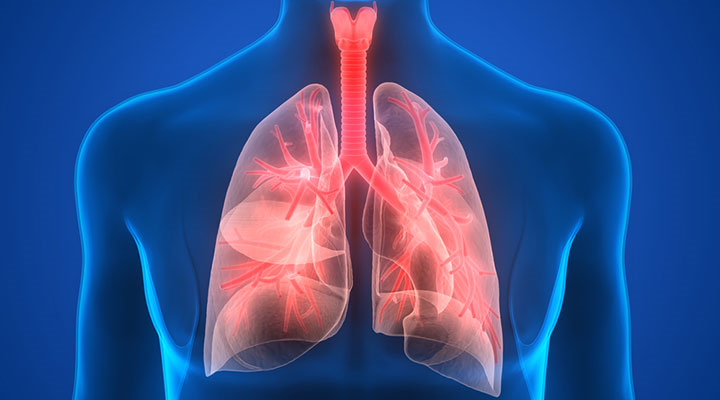

Medical imaging is a technique and process of creating visual representations of the interior of a body for clinical analysis and medical intervention, as well as visual representation of the function of some organs or tissues (physiology)

<h3>X-rays</h3>

<h3>Ultrasound</h3>

<h3>Computed Tomography(CT)</h3>

<h3>Magnetic resonance(MRI)</h3>

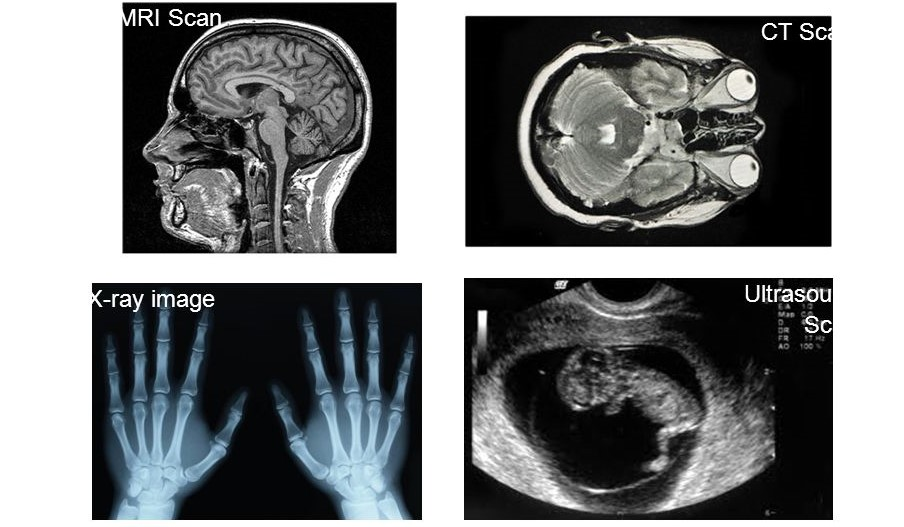

<h2><center>Prediction Of Pneumonia </center></h2>
<p><center> Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Typically symptoms include some combination of productive or dry cough, chest pain, fever, and trouble breathing.Severity is variable.</center>
</p>

<p>The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are <b><i>5,863</i></b> X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).</p>

NORMAL


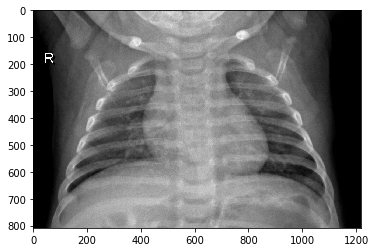

In [29]:
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('dataset/training_set/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


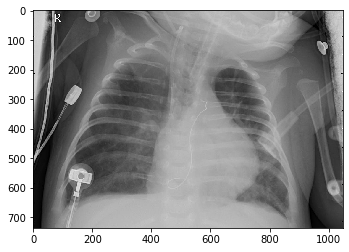

In [30]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('dataset/training_set/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

<h2>Coding the Deep Learning Model</h2>

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf

In [35]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [36]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
nb_train_samples= 5216

Found 5216 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')
nb_validation_samples = 16

Found 16 images belonging to 2 classes.


In [8]:
batch_size= 16
classifier.fit_generator(training_set,
                         steps_per_epoch = nb_train_samples // batch_size,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = nb_validation_samples // batch_size)


Epoch 1/20
326/326 [==============================] - 190s 584ms/step - loss: 0.2904 - acc: 0.8742 - val_loss: 0.4146 - val_acc: 0.6875
Epoch 2/20
326/326 [==============================] - 189s 579ms/step - loss: 0.1909 - acc: 0.9218 - val_loss: 0.2569 - val_acc: 0.9375
Epoch 3/20
326/326 [==============================] - 188s 578ms/step - loss: 0.1730 - acc: 0.9303 - val_loss: 0.3665 - val_acc: 0.7500
Epoch 4/20
326/326 [==============================] - 194s 595ms/step - loss: 0.1589 - acc: 0.9378 - val_loss: 0.3883 - val_acc: 0.8125
Epoch 5/20
326/326 [==============================] - 201s 617ms/step - loss: 0.1413 - acc: 0.9461 - val_loss: 0.2903 - val_acc: 0.8125
Epoch 6/20
326/326 [==============================] - 201s 617ms/step - loss: 0.1379 - acc: 0.9471 - val_loss: 0.3346 - val_acc: 0.8125
Epoch 7/20
326/326 [==============================] - 203s 622ms/step - loss: 0.1234 - acc: 0.9539 - val_loss: 0.3712 - val_acc: 0.7500
Epoch 8/20
326/326 [===========================

In [20]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

<h2>Making prediction </h2>
<p>select a image and check if our machine has made a right prediction</p> 

In [55]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [65]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
single_predictions = 'dataset/single_value/NORMAL/NORMAL2-IM-0013-0001.jpeg'
test_image = image.load_img(single_predictions, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] >=0.6 :
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'

[[1.0404106e-06]]


[[1.0404106e-06]]
Normal


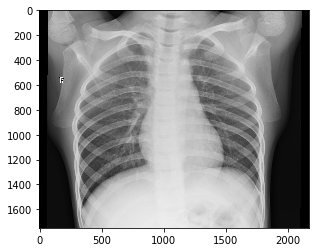

In [66]:

print(result)
print(prediction)
img_pneumonia = load_img(single_predictions)

plt.imshow(img_pneumonia)
plt.show()